# ML Project code

## Importing data and libraries

In [1]:
import numpy as np
import csv
import math
from sklearn.metrics.pairwise import rbf_kernel, linear_kernel
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression as LR
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import matplotlib

### Creating array of dataset

In [2]:
x_dataset = []
y_dataset = []

with open('preprocessed_dataset.tsv', 'r') as preprocessed_data:
    preprocessed_data_reader = csv.reader(preprocessed_data)
    headers = next(preprocessed_data_reader)
#    for row in preprocessed_data_reader:
#        row = [float(string) for string in row]
#        row[0] = int(row[0])
#        x_row = []
#        for i in range(1,41):
#            if i != 12:
#                x_row.append(row[i])
#        x_dataset.append(x_row)
#        y_dataset.append(row[12])

In [3]:
features = headers[1:]
#X_dataset = np.array(x_dataset)
#Y_dataset = np.array(y_dataset)
#np.shape(X_dataset)


In [4]:
data = np.genfromtxt('preprocessed_dataset.tsv',dtype = 'float', delimiter=",", skip_header=1)
data = data[:,1:]
Y_dataset = data[:,12]
X_dataset = np.delete(np.copy(data), 12, 1)

y_feature = features[12]
x_features = features.copy()
x_features.pop(12)

'Survival After 10 Years'

In [5]:
## We want to divide data into 8:2 ratio 
index = 1558
[x_train,x,x_test] = np.split(X_dataset, [index,index], axis=0)
[y_train,y,y_test] = np.split(Y_dataset, [index,index])

In [6]:
#x_train[14]

In [7]:
#parameters = np.linspace(1,100,num = 100)
#score_array = np.zeros(100)


#for i in range(100):
#    lasso = Lasso(parameters[i], selection = 'random')
#    lasso.fit(x_train, y_train)
#    score_array[i] = lasso.score(x_test, y_test, sample_weight=None)

#best_param = parameters[np.argmin(score_array)]

In [8]:
#best_lasso = Lasso(best_param, selection = 'random')
#best_lasso.fit(x_train, y_train)
#print(best_lasso.feature_names_in_)

## L1 Logistic Regression and Kernelized SVM

In [9]:
#parameters = np.linspace(1,100,num = 100)
cycles = 50

# parameters ranges
kpara_range = np.logspace(-1,1,10)
reg_range = np.linspace(1, 100, 10)

In [10]:
# shape of training data
n,d = np.shape(x_train)
randomized_indices = np.random.permutation(np.arange(n))
# number of folds
K = 5

k = n//K
indices = []
for i in range(4):
    indices.append(randomized_indices[i*k:(i+1)*k])
indices.append(randomized_indices[3*k:n])

l1_reg_scores = np.zeros(10)
svm_scores = np.zeros((10,10))


# loop through folds for parameter tunning
for k in range(K):
    print("Fold", k+1, "starting...")
    # created test and validation sets
    X = np.copy(x_train)
    y = np.copy(y_train)
    np.delete(X,indices[k],0)
    np.delete(y,indices[k],0)
    
    for reg in range(10):
        if reg == 5:
            print("Halfway there!")

        for kpara in range(10):
            
            # Kernelized SVM
            svm = SVC(C = 1/reg_range[reg], kernel = 'rbf', gamma = kpara_range[kpara])
            svm.fit(X,y)
            
            # compute score
            svm_scores[reg,kpara] += svm.score(x_train[indices[k]],y_train[indices[k]])
    
        # L1 logistic regression
        l1_reg = LR(penalty='l1', C = 1/reg_range[reg], solver = 'liblinear')
        l1_reg.fit(X,y)
        
        # compute score
        score = l1_reg.score(x_train[indices[k]], y_train[indices[k]])
        #print(score)
        l1_reg_scores[reg] += score
        
    print("Ooph! Fold", k+1, "finally done!\n")

Fold 1 starting...
Halfway there!
Ooph! Fold 1 finally done!

Fold 2 starting...
Halfway there!
Ooph! Fold 2 finally done!

Fold 3 starting...
Halfway there!
Ooph! Fold 3 finally done!

Fold 4 starting...
Halfway there!
Ooph! Fold 4 finally done!

Fold 5 starting...
Halfway there!
Ooph! Fold 5 finally done!



### Analysis, graphs and visualization

In [11]:
# identify best parameters 
best_l1_reg_param = reg_range[np.argmax(l1_reg_scores)]
print(best_l1_reg_param)
best_svm_param = [reg_range[np.argmax(svm_scores[0])],kpara_range[np.argmax(svm_scores[1])]]
print(best_svm_param)

1.0
[12.0, 0.1]


In [12]:
print(l1_reg_scores)
print(svm_scores)

[3.78872283 3.77592283 3.72455305 3.68766045 3.63624437 3.62659807
 3.6169672  3.60893633 3.62819807 3.60733633]
[[4.99356913 5.         5.         5.         5.         5.
  5.         5.         5.         5.        ]
 [2.78038842 2.78038842 2.78038842 2.78038842 2.78038842 2.78038842
  2.78038842 2.78038842 2.78038842 2.78038842]
 [2.78038842 2.78038842 2.78038842 2.78038842 2.78038842 2.78038842
  2.78038842 2.78038842 2.78038842 2.78038842]
 [2.78038842 2.78038842 2.78038842 2.78038842 2.78038842 2.78038842
  2.78038842 2.78038842 2.78038842 2.78038842]
 [2.78038842 2.78038842 2.78038842 2.78038842 2.78038842 2.78038842
  2.78038842 2.78038842 2.78038842 2.78038842]
 [2.78038842 2.78038842 2.78038842 2.78038842 2.78038842 2.78038842
  2.78038842 2.78038842 2.78038842 2.78038842]
 [2.78038842 2.78038842 2.78038842 2.78038842 2.78038842 2.78038842
  2.78038842 2.78038842 2.78038842 2.78038842]
 [2.78038842 2.78038842 2.78038842 2.78038842 2.78038842 2.78038842
  2.78038842 2.7803884

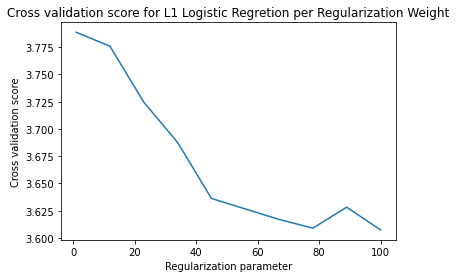

In [13]:
## plot score results for cross validation to determine regularization parameter
plt.plot(reg_range,l1_reg_scores)
plt.title('Cross validation score for L1 Logistic Regretion per Regularization Weight')
plt.xlabel('Regularization parameter')
plt.ylabel('Cross validation score')
plt.savefig('l1_cross_validation_plot.png')

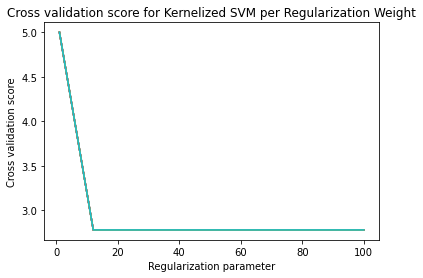

In [14]:
## plot score results for cross validation to determine regularization parameter
plt.plot(reg_range,svm_scores)
plt.title('Cross validation score for Kernelized SVM per Regularization Weight')
plt.xlabel('Regularization parameter')
plt.ylabel('Cross validation score')
plt.savefig('svm_cross_validation_plot.png')

In [15]:
# fit best parameter into L1 Logistic Regression and Kernelized Ridge Regression
# from graphs above, we decided to choose the parameter _lambda = 90 for 
# L1 logistic regression and 12 for kernelizer ridge regression.

best_svm = SVC(C = 1/12, kernel = 'rbf', gamma = 0.1)
best_svm.fit(x_train, y_train)
# accuracy
print("Score of Kernelized SVM", best_svm.score(x_test,y_test))

best_l1_reg = LR(penalty='l1', C = 1/90, solver = 'liblinear')
best_l1_reg.fit(x_train, y_train)
# accuracy
print("Score of L1 Logistic Regression", best_l1_reg.score(x_test,y_test))
# weights
print("L1 Logistic Regression weights:", best_l1_reg.coef_)
#print(best_lasso.feature_names_in_)


Score of Kernelized SVM 0.5751633986928104
Score of L1 Logistic Regression 0.7320261437908496
L1 Logistic Regression weights: [[-0.00903915  0.01875587  0.0920997   0.          0.          0.
   0.          0.01378957 -0.08529411  0.          0.          0.
   0.         -0.00948657  0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.91475985  0.        ]]


In [16]:
score = best_l1_reg.score(x_test,y_test)
print(score)
nonzero_indices = np.nonzero(best_l1_reg.coef_)
x_features = np.copy(x_features)
print("Important features: " , x_features[nonzero_indices[1]])

0.7320261437908496
Important features:  ['Age at Diagnosis' 'Cancer Type Detailed' 'Pam50 + Claudin-low subtype'
 'Integrative Cluster' 'Lymph nodes examined positive' 'Tumor Size'
 'Relapse Free Status_0:Not Recurred']


## Random Forrest

In [22]:
tree_param = 600
tree_score = 0


rf = RF(n_estimators = tree_param, max_depth=5)
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=600)

### Analysis Graphs and visualization

In [23]:
# compute score
tree_score = rf.score(x_test,y_test)
print("Random forests score:", tree_score)

prediction = rf.predict(x_test)

Random forests score: 0.7777777777777778


In [24]:
print(features[np.argmax(rf.feature_importances_)])

Relapse Free Status_0:Not Recurred


In [29]:
# top k features
k=5

print('Most important features for random forests:')
feat_imp = rf.feature_importances_
for i in range(k):
    index = np.argmax(feat_imp)
    print(features[index])
    feat_imp = np.delete(feat_imp, index)



Most important features for random forests:
Relapse Free Status_0:Not Recurred
Radio Therapy_YES
Age at Diagnosis
Mutation Count
Integrative Cluster
